# BY- JAYENT SINGH PARIHAR

# Project - Uber Drives

## Trip Purpose Prediction

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

### Load the Dataset

In [2]:
# Load the dataset
uber_df = pd.read_csv('/content/My Uber Drives - 2016.csv')

### Data Exploration

In [3]:
# View the first few rows
print(uber_df.head())

# Check for missing values
print(uber_df.isnull().sum())

      START_DATE*       END_DATE* CATEGORY*       START*            STOP*  \
0  1/1/2016 21:11  1/1/2016 21:17  Business  Fort Pierce      Fort Pierce   
1   1/2/2016 1:25   1/2/2016 1:37  Business  Fort Pierce      Fort Pierce   
2  1/2/2016 20:25  1/2/2016 20:38  Business  Fort Pierce      Fort Pierce   
3  1/5/2016 17:31  1/5/2016 17:45  Business  Fort Pierce      Fort Pierce   
4  1/6/2016 14:42  1/6/2016 15:49  Business  Fort Pierce  West Palm Beach   

   MILES*         PURPOSE*  
0     5.1   Meal/Entertain  
1     5.0              NaN  
2     4.8  Errand/Supplies  
3     4.7          Meeting  
4    63.7   Customer Visit  
START_DATE*      0
END_DATE*        1
CATEGORY*        1
START*           1
STOP*            1
MILES*           0
PURPOSE*       503
dtype: int64


### Data Preprocessing

Convert Date Columns to Datetime

In [4]:
# Load the dataset and skip the footer
uber_df = pd.read_csv('/content/My Uber Drives - 2016.csv', skipfooter=1, engine='python')

# Convert START_DATE* and END_DATE* to datetime
uber_df['START_DATE*'] = pd.to_datetime(uber_df['START_DATE*'], format='%m/%d/%Y %H:%M')
uber_df['END_DATE*'] = pd.to_datetime(uber_df['END_DATE*'], format='%m/%d/%Y %H:%M')

Calculate Trip Duration

In [5]:
# Calculate trip duration in minutes
uber_df['Trip_Duration'] = (uber_df['END_DATE*'] - uber_df['START_DATE*']).dt.total_seconds() / 60

Extract Time Features

In [6]:
# Extract hour, day, and month from START_DATE*
uber_df['Start_Hour'] = uber_df['START_DATE*'].dt.hour
uber_df['Start_Day'] = uber_df['START_DATE*'].dt.dayofweek  # Monday=0, Sunday=6
uber_df['Start_Month'] = uber_df['START_DATE*'].dt.month

Handle Missing Values

In [7]:
# Since PURPOSE* is the target variable, drop rows where it's missing
uber_df = uber_df.dropna(subset=['PURPOSE*'])

# For simplicity, drop rows with any remaining missing values
uber_df = uber_df.dropna()

### Encode Categorical Variables

Combine START and STOP Locations

In [8]:
# Combine START* and STOP* locations into a single feature or encode separately
locations = pd.concat([uber_df['START*'], uber_df['STOP*']])
location_encoder = LabelEncoder()
location_encoder.fit(locations)

uber_df['Start_Loc_Enc'] = location_encoder.transform(uber_df['START*'])
uber_df['Stop_Loc_Enc'] = location_encoder.transform(uber_df['STOP*'])

Encode CATEGORY

In [9]:
# Encode CATEGORY* (Business/Personal)
category_encoder = LabelEncoder()
uber_df['Category_Enc'] = category_encoder.fit_transform(uber_df['CATEGORY*'])

Encode PURPOSE

In [10]:
# Encode PURPOSE* (Target Variable)
purpose_encoder = LabelEncoder()
uber_df['Purpose_Enc'] = purpose_encoder.fit_transform(uber_df['PURPOSE*'])

Prepare Features and Target Variable

In [11]:
# Features
X = uber_df[['MILES*', 'Trip_Duration', 'Start_Hour', 'Start_Day', 'Start_Month', 'Start_Loc_Enc', 'Stop_Loc_Enc', 'Category_Enc']]

# Target
y = uber_df['Purpose_Enc']

Split the Data

In [12]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Train a Machine Learning Model

In [13]:
# Initialize the classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Evaluate the Model

Classification Report:
                 precision    recall  f1-score   support

Between Offices       0.00      0.00      0.00         3
 Customer Visit       0.50      0.27      0.35        30
Errand/Supplies       0.60      0.44      0.51        27
 Meal/Entertain       0.43      0.69      0.53        29
        Meeting       0.43      0.63      0.51        30
         Moving       0.00      0.00      0.00         1
 Temporary Site       0.25      0.09      0.13        11

       accuracy                           0.46       131
      macro avg       0.32      0.30      0.29       131
   weighted avg       0.45      0.46      0.43       131



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


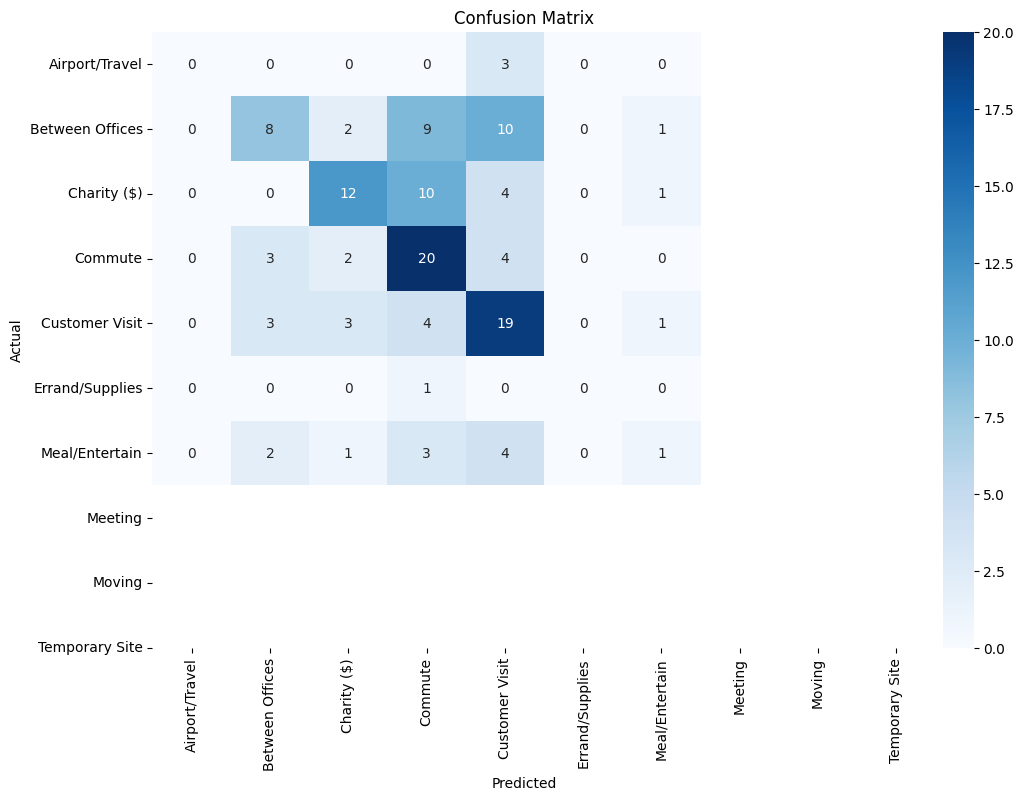

In [14]:
# Predict on the test set
y_pred = rf_classifier.predict(X_test)

# Decode the predicted labels
y_pred_labels = purpose_encoder.inverse_transform(y_pred)
y_test_labels = purpose_encoder.inverse_transform(y_test)

# Classification report
print("Classification Report:")
print(classification_report(y_test_labels, y_pred_labels))

# Confusion matrix
cm = confusion_matrix(y_test_labels, y_pred_labels)

# Plot confusion matrix
plt.figure(figsize=(12,8))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=purpose_encoder.classes_, yticklabels=purpose_encoder.classes_, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Trip Duration Prediction

### Prepare Features and Target Variable

In [15]:
# Features (excluding Trip_Duration)
X = uber_df[['MILES*', 'Start_Hour', 'Start_Day', 'Start_Month', 'Start_Loc_Enc', 'Stop_Loc_Enc', 'Category_Enc', 'Purpose_Enc']]

# Target variable: Trip Duration
y = uber_df['Trip_Duration']

## Split the Data

In [16]:
# Split into training and testing sets
X_train_td, X_test_td, y_train_td, y_test_td = train_test_split(X, y, test_size=0.2, random_state=42)

## Train a Regression Model

In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_regressor.fit(X_train_td, y_train_td)

RandomForestRegressor(random_state=42)

## Evaluate the Model

Mean Squared Error: 122.26
R-squared Score: 0.67


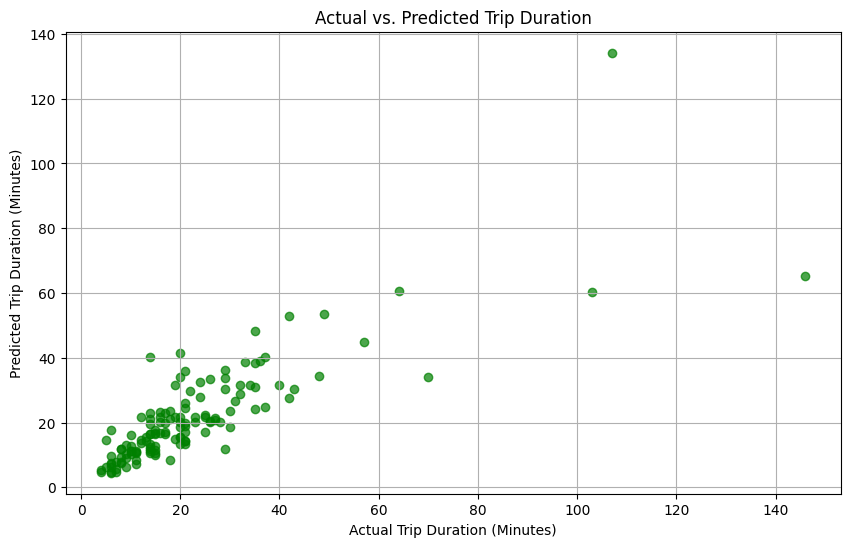

In [18]:
# Predict on the test set
y_pred_td = rf_regressor.predict(X_test_td)

# Calculate Mean Squared Error and R-squared
mse = mean_squared_error(y_test_td, y_pred_td)
r2 = r2_score(y_test_td, y_pred_td)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.2f}")

# Plot actual vs predicted durations
plt.figure(figsize=(10,6))
plt.scatter(y_test_td, y_pred_td, alpha=0.7, color='green')
plt.xlabel('Actual Trip Duration (Minutes)')
plt.ylabel('Predicted Trip Duration (Minutes)')
plt.title('Actual vs. Predicted Trip Duration')
plt.grid(True)
plt.show()

## Business vs. Personal Prediction

### Prepare Features and Target Variable

In [19]:
# Features
X = uber_df[['MILES*', 'Trip_Duration', 'Start_Hour', 'Start_Day', 'Start_Month', 'Start_Loc_Enc', 'Stop_Loc_Enc', 'Purpose_Enc']]

# Target variable: CATEGORY*
y = uber_df['Category_Enc']

### Split the Data

In [20]:
# Split into training and testing sets
X_train_bp, X_test_bp, y_train_bp, y_test_bp = train_test_split(X, y, test_size=0.2, random_state=42)

### Train the Model

In [21]:
# Initialize the classifier
rf_classifier_bp = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier_bp.fit(X_train_bp, y_train_bp)

RandomForestClassifier(random_state=42)

### Evaluate the Model

Classification Report:
              precision    recall  f1-score   support

    Business       0.99      1.00      1.00       130
    Personal       0.00      0.00      0.00         1

    accuracy                           0.99       131
   macro avg       0.50      0.50      0.50       131
weighted avg       0.98      0.99      0.99       131



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


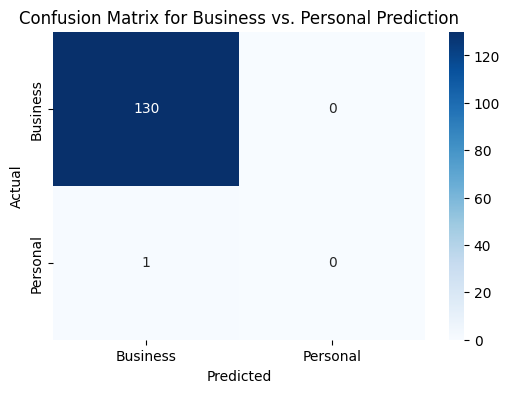

In [22]:
# Predict on the test set
y_pred_bp = rf_classifier_bp.predict(X_test_bp)

# Decode the predicted labels
y_pred_labels_bp = category_encoder.inverse_transform(y_pred_bp)
y_test_labels_bp = category_encoder.inverse_transform(y_test_bp)

# Classification report
print("Classification Report:")
print(classification_report(y_test_labels_bp, y_pred_labels_bp))

# Confusion matrix
cm_bp = confusion_matrix(y_test_labels_bp, y_pred_labels_bp)

# Plot confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm_bp, annot=True, fmt='d', xticklabels=category_encoder.classes_, yticklabels=category_encoder.classes_, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Business vs. Personal Prediction')
plt.show()

# Behavioral Pattern Recognition

## Daily/Weekly Routine Detection

### Trips on Each Day of the Week

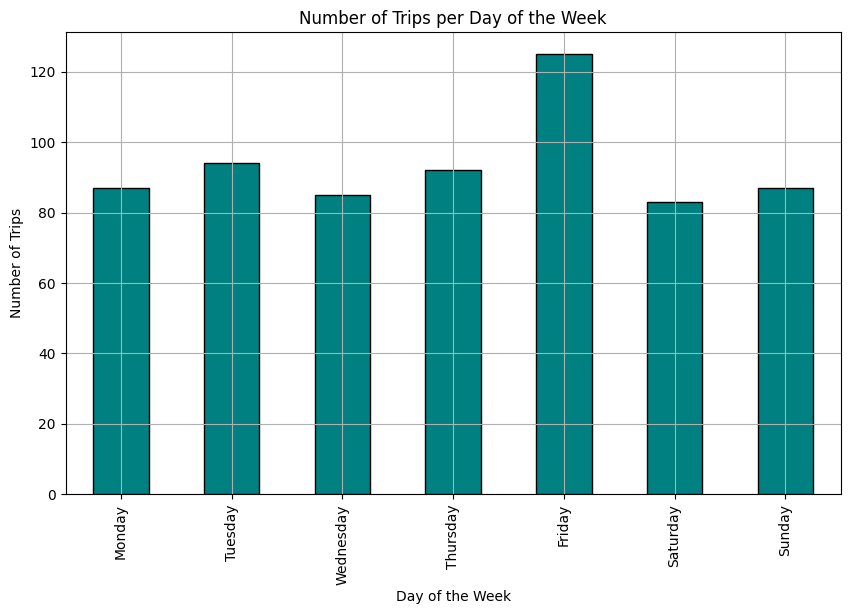

In [23]:
# Group by day of the week and count trips
daily_trips = uber_df.groupby('Start_Day').size()

# Map day numbers to day names
day_mapping = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
daily_trips.index = daily_trips.index.map(day_mapping)

# Plot trips per day
plt.figure(figsize=(10,6))
daily_trips.plot(kind='bar', color='teal', edgecolor='black')
plt.title('Number of Trips per Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Trips')
plt.grid(True)
plt.show()

### Common Start and Stop Locations on Mondays

In [24]:
# Filter trips on Mondays
monday_trips = uber_df[uber_df['Start_Day'] == 0]

# Most common start locations on Mondays
monday_start_locs = monday_trips['START*'].value_counts().head()
print("Common Start Locations on Mondays:")
print(monday_start_locs)

# Most common stop locations on Mondays
monday_stop_locs = monday_trips['STOP*'].value_counts().head()
print("\nCommon Stop Locations on Mondays:")
print(monday_stop_locs)

Common Start Locations on Mondays:
START*
Cary                19
Morrisville          6
Whitebridge          6
Unknown Location     5
Lahore               5
Name: count, dtype: int64

Common Stop Locations on Mondays:
STOP*
Cary                19
Whitebridge         11
Unknown Location     7
Morrisville          6
Lahore               4
Name: count, dtype: int64


## Morning vs. Evening Behavior

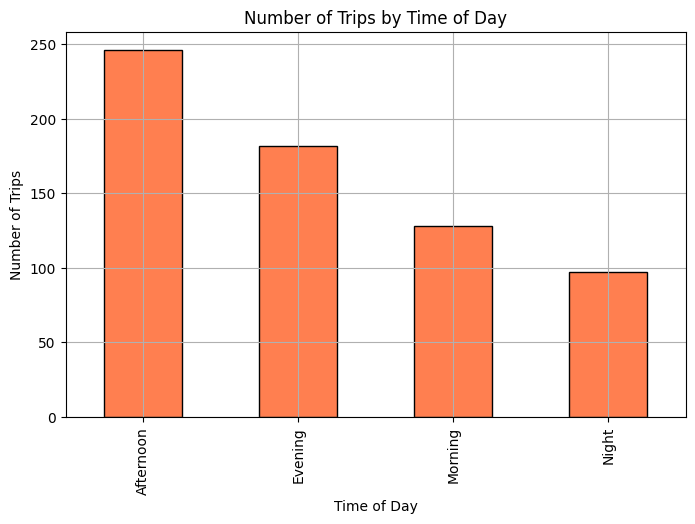

<ipython-input-25-390feee61735>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Time_of_Day', y='MILES*', data=uber_df, palette='pastel')


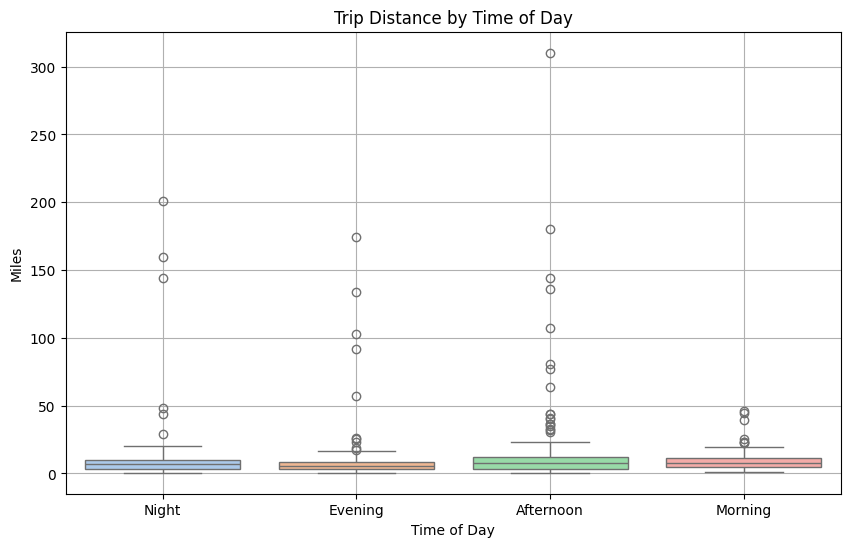

In [25]:
# Define time bins
def time_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

uber_df['Time_of_Day'] = uber_df['Start_Hour'].apply(time_of_day)

# Trips per time of day
time_of_day_trips = uber_df['Time_of_Day'].value_counts()

# Plot trips per time of day
plt.figure(figsize=(8,5))
time_of_day_trips.plot(kind='bar', color='coral', edgecolor='black')
plt.title('Number of Trips by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Number of Trips')
plt.grid(True)
plt.show()

# Analyze trip distances by time of day
plt.figure(figsize=(10,6))
sns.boxplot(x='Time_of_Day', y='MILES*', data=uber_df, palette='pastel')
plt.title('Trip Distance by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Miles')
plt.grid(True)
plt.show()

## Busy vs. Idle Periods

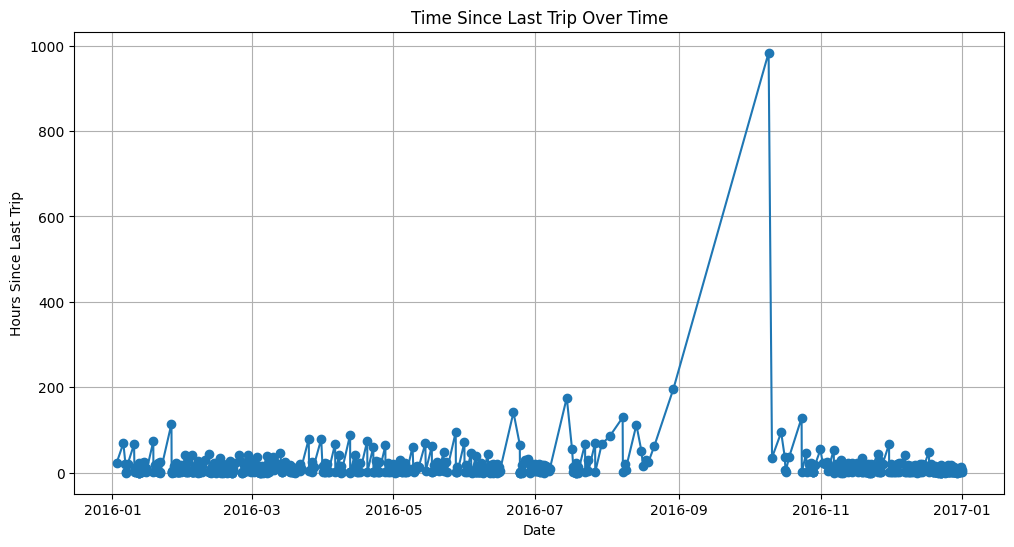

In [26]:
# Sort trips by start date
uber_df_sorted = uber_df.sort_values('START_DATE*')

# Calculate time difference between trips
uber_df_sorted['Time_Since_Last_Trip'] = uber_df_sorted['START_DATE*'].diff().dt.total_seconds() / 3600  # in hours

# Plot time since last trip
plt.figure(figsize=(12,6))
plt.plot(uber_df_sorted['START_DATE*'], uber_df_sorted['Time_Since_Last_Trip'], marker='o', linestyle='-')
plt.title('Time Since Last Trip Over Time')
plt.xlabel('Date')
plt.ylabel('Hours Since Last Trip')
plt.grid(True)
plt.show()

# Advanced Time-Series Analysis

## Seasonal Decomposition

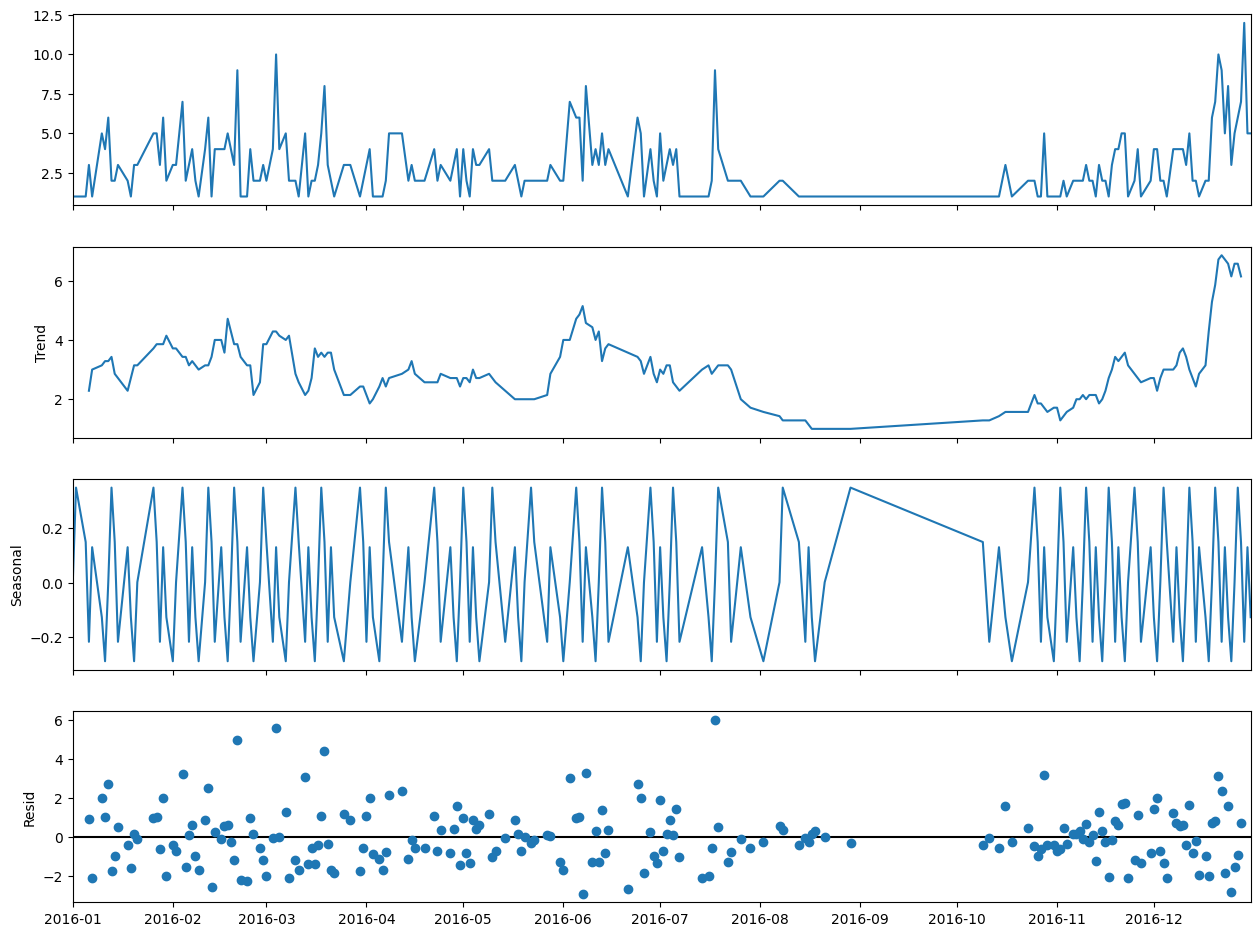

In [27]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Create a time series of trip counts per day
uber_df['Date'] = uber_df['START_DATE*'].dt.date
daily_trip_counts = uber_df.groupby('Date').size()

# Ensure the index is of datetime type
daily_trip_counts.index = pd.to_datetime(daily_trip_counts.index)

# Decompose the time series
decomposition = seasonal_decompose(daily_trip_counts, model='additive', period=7)

# Plot the decomposition
fig = decomposition.plot()
fig.set_size_inches(14, 10)
plt.show()

## Rolling Statistics

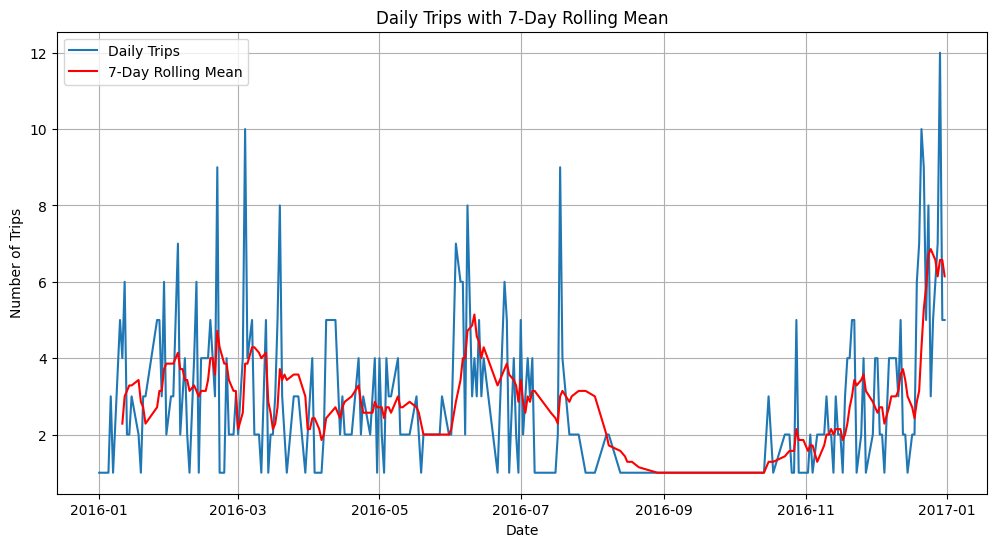

In [28]:
# Calculate rolling average of trip counts
rolling_mean = daily_trip_counts.rolling(window=7).mean()

# Plot rolling mean
plt.figure(figsize=(12,6))
plt.plot(daily_trip_counts.index, daily_trip_counts, label='Daily Trips')
plt.plot(rolling_mean.index, rolling_mean, label='7-Day Rolling Mean', color='red')
plt.title('Daily Trips with 7-Day Rolling Mean')
plt.xlabel('Date')
plt.ylabel('Number of Trips')
plt.legend()
plt.grid(True)
plt.show()

## Lag Analysis

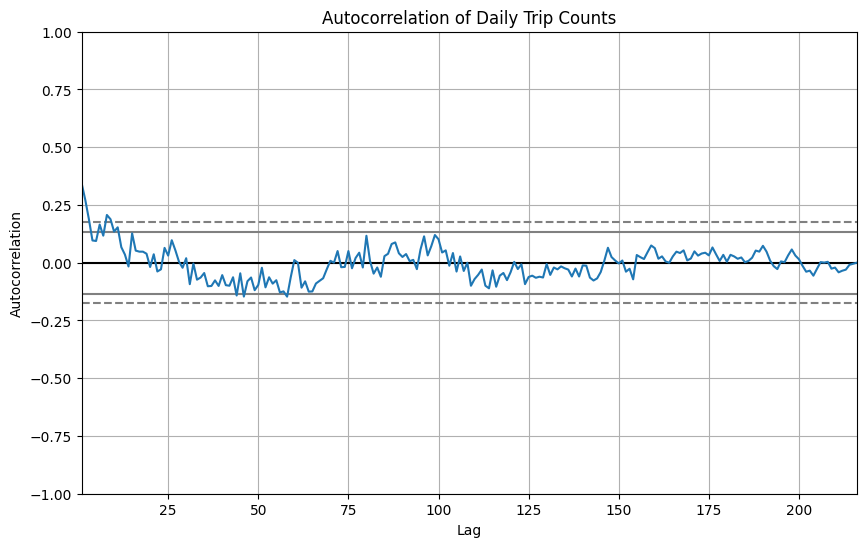

In [29]:
# Plot autocorrelation
from pandas.plotting import autocorrelation_plot

plt.figure(figsize=(10,6))
autocorrelation_plot(daily_trip_counts)
plt.title('Autocorrelation of Daily Trip Counts')
plt.show()

## Trip Duration Analysis

### Trip Duration Distribution

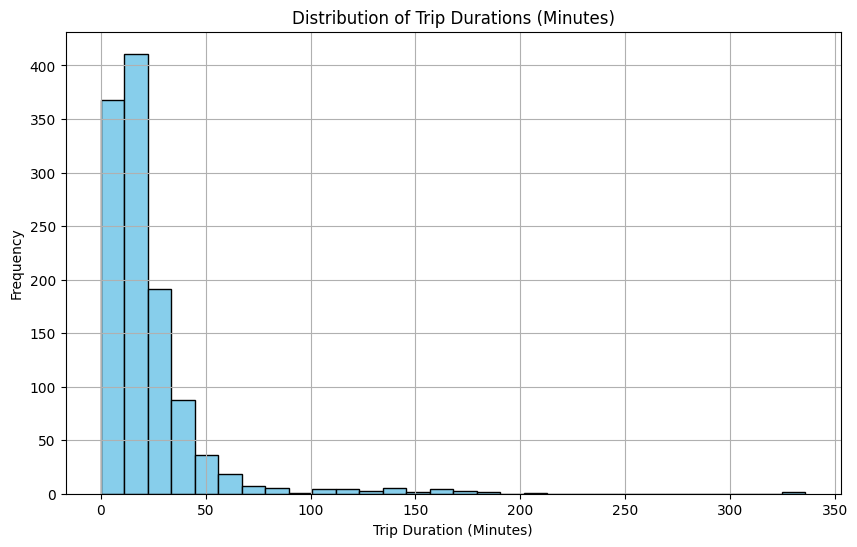

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataframe (replace 'your_file.csv' with the actual file name)
uber_drives_df = pd.read_csv('/content/My Uber Drives - 2016.csv')

# Convert START_DATE* and END_DATE* to datetime format
# Handle errors by coercing invalid values to NaT (Not a Time)
uber_drives_df['START_DATE*'] = pd.to_datetime(uber_drives_df['START_DATE*'], errors='coerce')
uber_drives_df['END_DATE*'] = pd.to_datetime(uber_drives_df['END_DATE*'], errors='coerce')

# Calculate trip duration in minutes
uber_drives_df['Trip_Duration'] = (uber_drives_df['END_DATE*'] - uber_drives_df['START_DATE*']).dt.total_seconds() / 60

# Plot the distribution of trip durations
plt.figure(figsize=(10,6))
plt.hist(uber_drives_df['Trip_Duration'].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Trip Durations (Minutes)')
plt.xlabel('Trip Duration (Minutes)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

### Duration vs. Distance Correlation

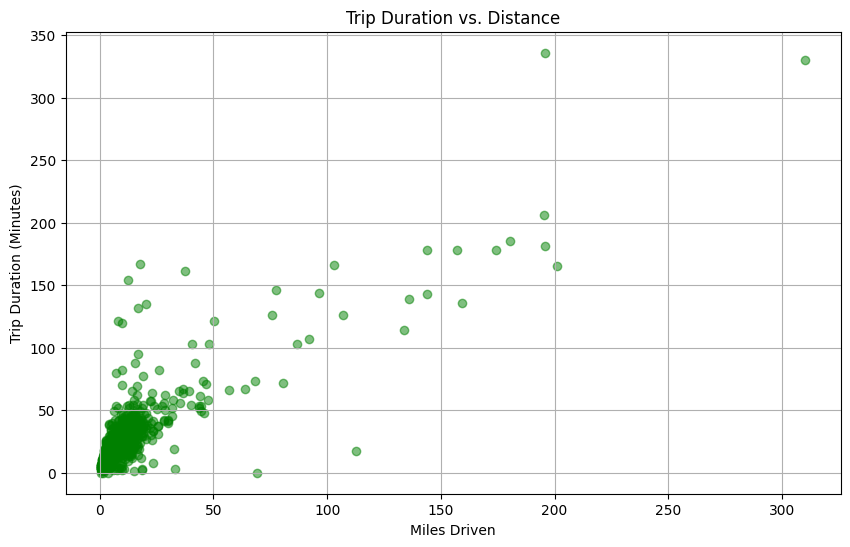

Correlation between miles driven and trip duration: 0.84


In [34]:
# Drop rows where 'MILES*' or 'Trip_Duration' are missing
df_filtered = uber_drives_df.dropna(subset=['MILES*', 'Trip_Duration'])

# Plot scatter plot for Trip Duration vs. Miles
plt.figure(figsize=(10,6))
plt.scatter(df_filtered['MILES*'], df_filtered['Trip_Duration'], alpha=0.5, color='green')
plt.title('Trip Duration vs. Distance')
plt.xlabel('Miles Driven')
plt.ylabel('Trip Duration (Minutes)')
plt.grid(True)
plt.show()

# Calculate the correlation between miles and trip duration
correlation = df_filtered['MILES*'].corr(df_filtered['Trip_Duration'])
print(f"Correlation between miles driven and trip duration: {correlation:.2f}")

## Trend Analysis

### Weekly/Monthly Trends

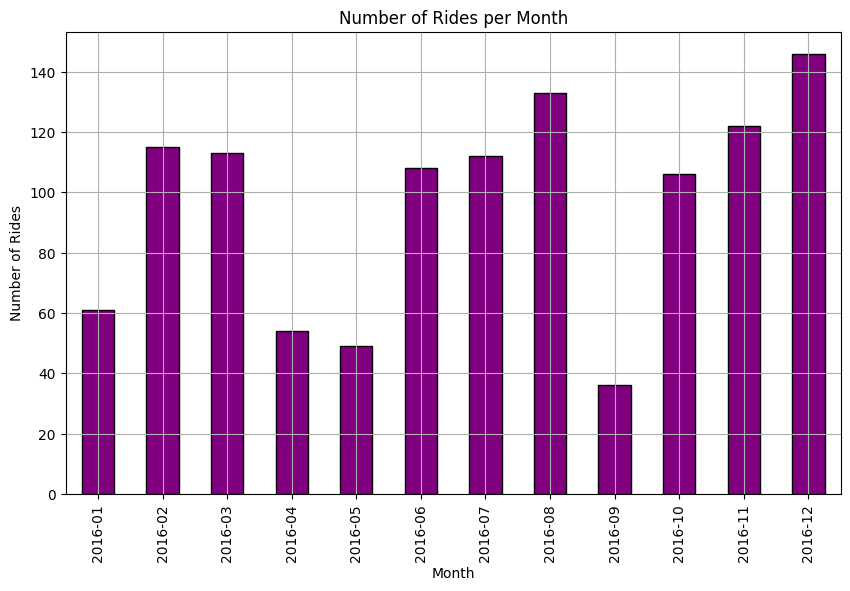

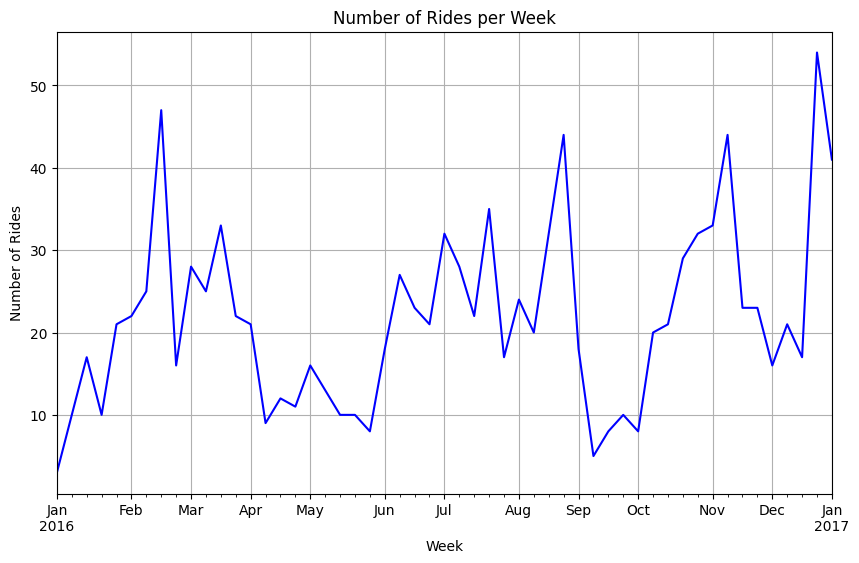

In [35]:
# Extract month and week from the start date for trend analysis
uber_drives_df['Month'] = uber_drives_df['START_DATE*'].dt.to_period('M')
uber_drives_df['Week'] = uber_drives_df['START_DATE*'].dt.to_period('W')

# Number of rides per month
rides_per_month = uber_drives_df['Month'].value_counts().sort_index()

# Plot number of rides per month
plt.figure(figsize=(10,6))
rides_per_month.plot(kind='bar', color='purple', edgecolor='black')
plt.title('Number of Rides per Month')
plt.xlabel('Month')
plt.ylabel('Number of Rides')
plt.grid(True)
plt.show()

# Number of rides per week
rides_per_week = uber_drives_df['Week'].value_counts().sort_index()

# Plot number of rides per week
plt.figure(figsize=(10,6))
rides_per_week.plot(kind='line', color='blue')
plt.title('Number of Rides per Week')
plt.xlabel('Week')
plt.ylabel('Number of Rides')
plt.grid(True)
plt.show()

### Trend by Day of Week

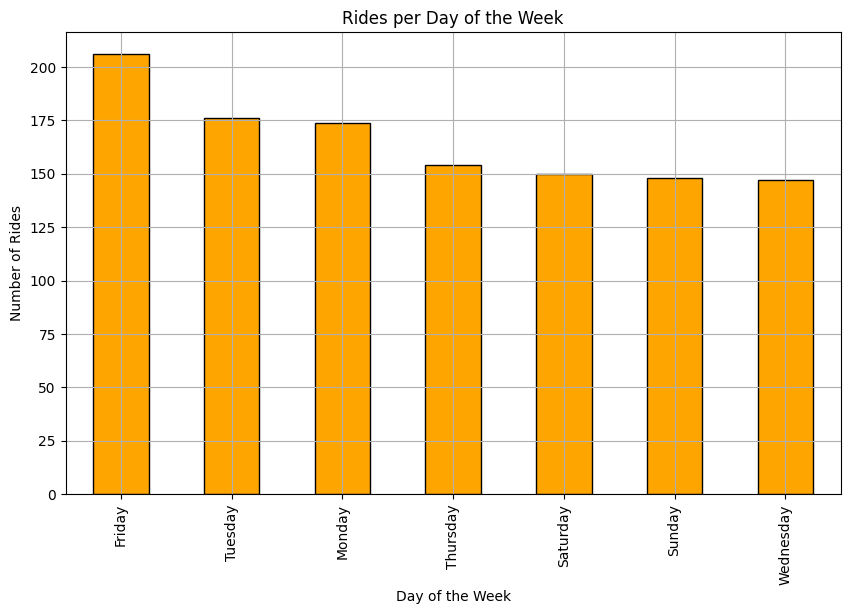

In [36]:
# Extract day of the week from start date
uber_drives_df['DayOfWeek'] = uber_drives_df['START_DATE*'].dt.day_name()

# Count rides per day of the week
rides_per_day = uber_drives_df['DayOfWeek'].value_counts()

# Plot rides per day of the week
plt.figure(figsize=(10,6))
rides_per_day.plot(kind='bar', color='orange', edgecolor='black')
plt.title('Rides per Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Rides')
plt.grid(True)
plt.show()

## Anomaly Detection

### Identify Unusual Trips

In [37]:
# Define thresholds for "unusual" trips (e.g., 2 standard deviations from the mean)
miles_mean = uber_drives_df['MILES*'].mean()
miles_std = uber_drives_df['MILES*'].std()

duration_mean = uber_drives_df['Trip_Duration'].mean()
duration_std = uber_drives_df['Trip_Duration'].std()

# Identify trips that are outliers based on distance and duration
outliers = uber_drives_df[
    (uber_drives_df['MILES*'] > miles_mean + 2 * miles_std) |
    (uber_drives_df['Trip_Duration'] > duration_mean + 2 * duration_std)
]

print("Unusual Trips:")
print(outliers[['START*', 'STOP*', 'MILES*', 'Trip_Duration']])

Unusual Trips:
                START*             STOP*   MILES*  Trip_Duration
232             Austin              Katy    136.0          139.0
268               Cary             Latta    144.0          178.0
269              Latta      Jacksonville    310.3          330.0
270       Jacksonville         Kissimmee    201.0          165.0
295          Kissimmee     Daytona Beach     77.3          146.0
297       Jacksonville         Ridgeland    174.2          178.0
298          Ridgeland          Florence    144.0          143.0
299           Florence              Cary    159.3          136.0
471           Metairie       New Orleans     15.5           88.0
546        Morrisville        Banner Elk    195.3          206.0
554            Newland             Boone     41.9           88.0
559              Boone              Cary    180.2          185.0
659   Unknown Location  Unknown Location     25.9           82.0
704   Unknown Location  Unknown Location      7.9          121.0
707   Unkn

### Outlier Detection

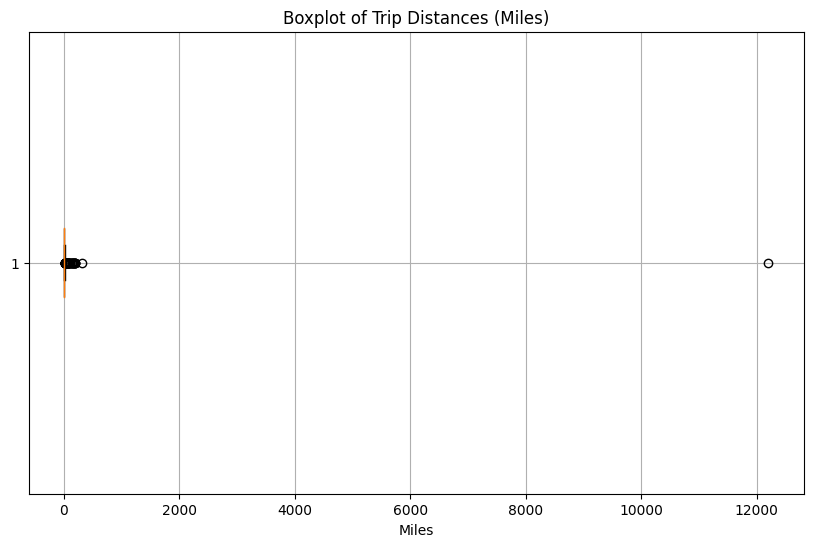

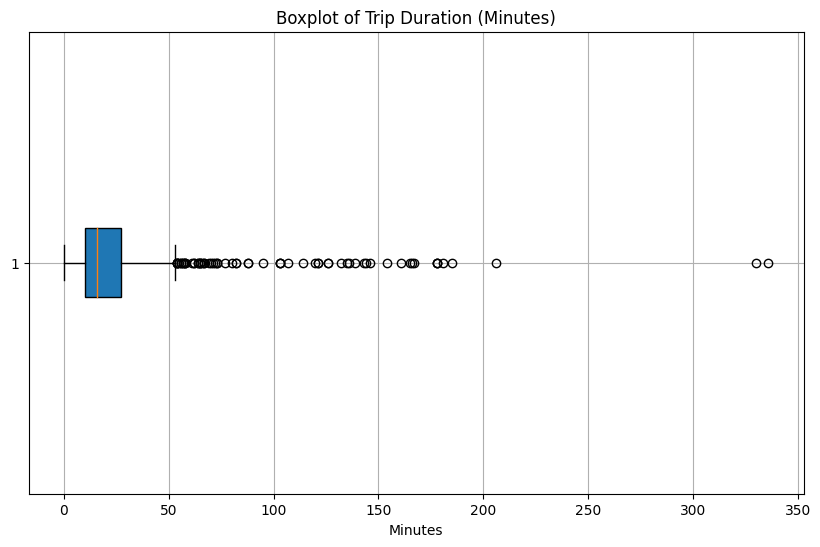

In [38]:
# Plot boxplot for trip distance
plt.figure(figsize=(10,6))
plt.boxplot(uber_drives_df['MILES*'].dropna(), vert=False, patch_artist=True)
plt.title('Boxplot of Trip Distances (Miles)')
plt.xlabel('Miles')
plt.grid(True)
plt.show()

# Plot boxplot for trip duration
plt.figure(figsize=(10,6))
plt.boxplot(uber_drives_df['Trip_Duration'].dropna(), vert=False, patch_artist=True)
plt.title('Boxplot of Trip Duration (Minutes)')
plt.xlabel('Minutes')
plt.grid(True)
plt.show()

## Seasonality Analysis

### Seasonal Patterns

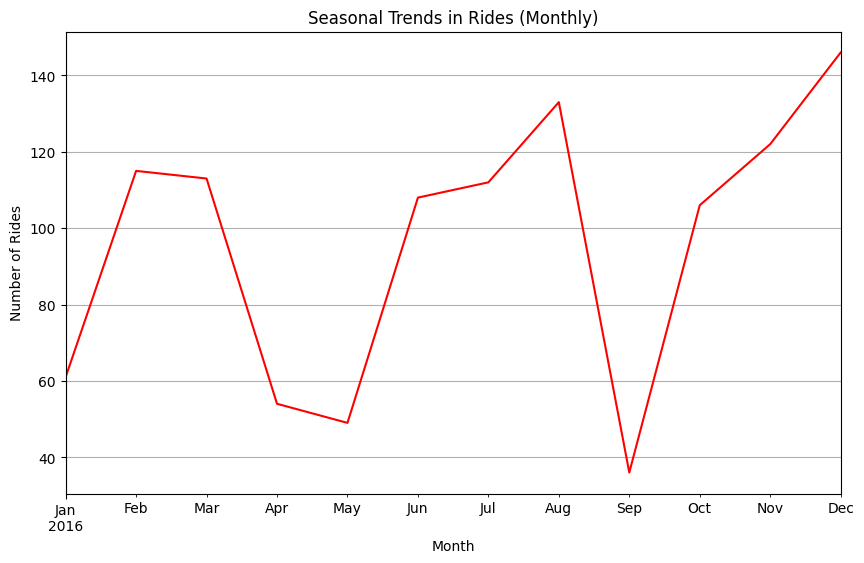

In [39]:
# Group rides by month to check seasonality
seasonal_rides = uber_drives_df.groupby(uber_drives_df['Month']).size()

# Plot seasonal trends (monthly)
plt.figure(figsize=(10,6))
seasonal_rides.plot(kind='line', color='red')
plt.title('Seasonal Trends in Rides (Monthly)')
plt.xlabel('Month')
plt.ylabel('Number of Rides')
plt.grid(True)
plt.show()

## Descriptive Analysis

### Basic Trip Statistics:
### Total number of rides
### Total distance driven (in miles)
### Breakdown of rides by category (Business vs. Personal)

In [40]:
# Total number of rides
total_rides = len(uber_drives_df)

# Total distance driven (in miles)
total_miles = uber_drives_df['MILES*'].sum()

# Breakdown of rides by category (Business vs. Personal)
category_breakdown = uber_drives_df['CATEGORY*'].value_counts()

print("Total Rides:", total_rides)
print("Total Miles Driven:", total_miles)
print("\nBreakdown by Category:\n", category_breakdown)

Total Rides: 1156
Total Miles Driven: 24409.4

Breakdown by Category:
 CATEGORY*
Business    1078
Personal      77
Name: count, dtype: int64


### Average Trip Length:
### Calculate the average distance for a trip

In [41]:
# Average distance for a trip
average_trip_length = uber_drives_df['MILES*'].mean()
print("Average Trip Length (Miles):", average_trip_length)

Average Trip Length (Miles): 21.115397923875435


### Trips by Purpose:
### The most common purposes of trips


In [42]:
# Most common purposes of trips
common_purposes = uber_drives_df['PURPOSE*'].value_counts()
print("Most Common Purposes:\n", common_purposes)

Most Common Purposes:
 PURPOSE*
Meeting            187
Meal/Entertain     160
Errand/Supplies    128
Customer Visit     101
Temporary Site      50
Between Offices     18
Moving               4
Airport/Travel       3
Charity ($)          1
Commute              1
Name: count, dtype: int64


### Trips by Location:
### Most frequent start and stop locations


In [43]:
# Most frequent start and stop locations
frequent_start_locations = uber_drives_df['START*'].value_counts().head(5)
frequent_stop_locations = uber_drives_df['STOP*'].value_counts().head(5)

print("Frequent Start Locations:\n", frequent_start_locations)
print("\nFrequent Stop Locations:\n", frequent_stop_locations)

Frequent Start Locations:
 START*
Cary                201
Unknown Location    148
Morrisville          85
Whitebridge          68
Islamabad            57
Name: count, dtype: int64

Frequent Stop Locations:
 STOP*
Cary                203
Unknown Location    149
Morrisville          84
Whitebridge          65
Islamabad            58
Name: count, dtype: int64


## Time Series Analysis

### Rides Over Time:
Number of rides per week/month

Peak travel times (days/times with most rides)

In [44]:
# Convert START_DATE* to datetime for analysis
uber_drives_df['START_DATE*'] = pd.to_datetime(uber_drives_df['START_DATE*'])

# Number of rides per month
uber_drives_df['Month'] = uber_drives_df['START_DATE*'].dt.to_period('M')
rides_per_month = uber_drives_df['Month'].value_counts().sort_index()

# Number of rides per day of week
uber_drives_df['DayOfWeek'] = uber_drives_df['START_DATE*'].dt.day_name()
rides_per_day_of_week = uber_drives_df['DayOfWeek'].value_counts()

print("Rides Per Month:\n", rides_per_month)
print("\nRides Per Day of Week:\n", rides_per_day_of_week)

Rides Per Month:
 Month
2016-01     61
2016-02    115
2016-03    113
2016-04     54
2016-05     49
2016-06    108
2016-07    112
2016-08    133
2016-09     36
2016-10    106
2016-11    122
2016-12    146
Freq: M, Name: count, dtype: int64

Rides Per Day of Week:
 DayOfWeek
Friday       206
Tuesday      176
Monday       174
Thursday     154
Saturday     150
Sunday       148
Wednesday    147
Name: count, dtype: int64


### Trip Duration:
Calculate the average time spent per trip

In [45]:
# Convert END_DATE* to datetime
uber_drives_df['END_DATE*'] = pd.to_datetime(uber_drives_df['END_DATE*'])

# Calculate trip duration
uber_drives_df['Trip_Duration'] = (uber_drives_df['END_DATE*'] - uber_drives_df['START_DATE*']).dt.total_seconds() / 60

# Average trip duration in minutes
average_trip_duration = uber_drives_df['Trip_Duration'].mean()
print("Average Trip Duration (Minutes):", average_trip_duration)

Average Trip Duration (Minutes): 23.243290043290042


## Comparative Analysis

### Business vs. Personal Rides:
Percentage of rides for business versus personal

Total miles for business vs. personal

In [46]:
# Percentage of rides for business vs personal
business_vs_personal = uber_drives_df['CATEGORY*'].value_counts(normalize=True) * 100

# Total miles for business vs personal
miles_by_category = uber_drives_df.groupby('CATEGORY*')['MILES*'].sum()

print("Percentage of Business vs Personal Rides:\n", business_vs_personal)
print("\nMiles by Category (Business vs Personal):\n", miles_by_category)

Percentage of Business vs Personal Rides:
 CATEGORY*
Business    93.333333
Personal     6.666667
Name: proportion, dtype: float64

Miles by Category (Business vs Personal):
 CATEGORY*
Business    11487.0
Personal      717.7
Name: MILES*, dtype: float64


### Purpose of Trips:
Distribution of distances and number of rides across purposes

In [47]:
# Distribution of distances by purpose
miles_by_purpose = uber_drives_df.groupby('PURPOSE*')['MILES*'].sum()

# Number of rides by purpose
rides_by_purpose = uber_drives_df['PURPOSE*'].value_counts()

print("Miles by Purpose:\n", miles_by_purpose)
print("\nNumber of Rides by Purpose:\n", rides_by_purpose)

Miles by Purpose:
 PURPOSE*
Airport/Travel       16.5
Between Offices     197.0
Charity ($)          15.1
Commute             180.2
Customer Visit     2089.5
Errand/Supplies     508.0
Meal/Entertain      911.7
Meeting            2851.3
Moving               18.2
Temporary Site      523.7
Name: MILES*, dtype: float64

Number of Rides by Purpose:
 PURPOSE*
Meeting            187
Meal/Entertain     160
Errand/Supplies    128
Customer Visit     101
Temporary Site      50
Between Offices     18
Moving               4
Airport/Travel       3
Charity ($)          1
Commute              1
Name: count, dtype: int64


## Financial Analysis

### Estimate Cost Savings:
Estimate potential savings using Uber compared to a traditional taxi service (assuming taxi rates are higher)


In [48]:
# Assuming Uber cost is $1 per mile and traditional taxi cost is $1.5 per mile
uber_cost = uber_drives_df['MILES*'].sum() * 1
taxi_cost = uber_drives_df['MILES*'].sum() * 1.5

savings = taxi_cost - uber_cost
print("Estimated Savings using Uber vs Traditional Taxi: $", savings)

Estimated Savings using Uber vs Traditional Taxi: $ 12204.700000000004


### Tax Savings:
Calculate potential tax savings based on business miles (assuming business miles are tax-deductible)

In [49]:
# Assuming business miles are tax-deductible at $0.54 per mile
business_miles = uber_drives_df[uber_drives_df['CATEGORY*'] == 'Business']['MILES*'].sum()
tax_savings = business_miles * 0.54
print("Estimated Tax Savings from Business Miles: $", tax_savings)

Estimated Tax Savings from Business Miles: $ 6202.9800000000005


## Geographic Analysis

### Mapping Trips:
For mapping, we would use libraries like geopandas or folium, but here’s how to set up the data for mapping:

In [50]:
# The dataset doesn't have latitude/longitude, but assuming you can use start/stop locations for mapping.
# Example: Create a simple DataFrame to display start and stop locations for visualization
location_df = uber_drives_df[['START*', 'STOP*']].dropna()
print(location_df.head())

        START*            STOP*
0  Fort Pierce      Fort Pierce
1  Fort Pierce      Fort Pierce
2  Fort Pierce      Fort Pierce
3  Fort Pierce      Fort Pierce
4  Fort Pierce  West Palm Beach


### Clustering by Location:
Cluster trips based on start and stop locations using clustering algorithms like K-Means (requires geospatial coordinates)

In [51]:
# Perform clustering based on start and stop locations (requires further setup with location data)
from sklearn.cluster import KMeans

# This step requires converting start/stop locations to latitude/longitude or using a proxy for location data
# Example setup (assuming we had lat/lon data):
# kmeans = KMeans(n_clusters=3)
# kmeans.fit(location_data)

## User Behavior Insights

### Frequent Locations:
 Identify where the user typically starts or stops trips

In [52]:
# Identify frequent start and stop locations
frequent_starts = uber_drives_df['START*'].value_counts().head(10)
frequent_stops = uber_drives_df['STOP*'].value_counts().head(10)

print("Frequent Start Locations:\n", frequent_starts)
print("\nFrequent Stop Locations:\n", frequent_stops)

Frequent Start Locations:
 START*
Cary                201
Unknown Location    148
Morrisville          85
Whitebridge          68
Islamabad            57
Durham               37
Lahore               36
Raleigh              28
Kar?chi              27
Westpark Place       17
Name: count, dtype: int64

Frequent Stop Locations:
 STOP*
Cary                203
Unknown Location    149
Morrisville          84
Whitebridge          65
Islamabad            58
Durham               36
Lahore               36
Raleigh              29
Kar?chi              26
Apex                 17
Name: count, dtype: int64


### User's Travel Patterns:
Understand if the user takes more long or short trips

In [53]:
# Analyze distribution of trip distances
trip_length_distribution = uber_drives_df['MILES*'].describe()

print("Trip Length Distribution:\n", trip_length_distribution)

Trip Length Distribution:
 count     1156.000000
mean        21.115398
std        359.299007
min          0.500000
25%          2.900000
50%          6.000000
75%         10.400000
max      12204.700000
Name: MILES*, dtype: float64


### Trip Frequency:
Calculate how often the user takes trips during the week and identify busiest days

In [54]:
# Count number of rides per day of the week
rides_per_day = uber_drives_df['DayOfWeek'].value_counts()

print("Rides per Day of the Week:\n", rides_per_day)

Rides per Day of the Week:
 DayOfWeek
Friday       206
Tuesday      176
Monday       174
Thursday     154
Saturday     150
Sunday       148
Wednesday    147
Name: count, dtype: int64


## Advanced Analysis

### Trip Prediction:
Predict trip purpose using past data (requires a machine learning setup)

In [56]:
# Set up data for predictive modeling
# Example setup for training a simple classification model for trip purpose
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Assuming we use trip distance and start day/time as features
uber_drives_df['Trip_Duration'] = uber_drives_df['Trip_Duration'].fillna(uber_drives_df['Trip_Duration'].mean())  # Fill NaNs

# Remove rows with NaN values from both X and y
uber_drives_df = uber_drives_df.dropna(subset=['MILES*', 'Trip_Duration', 'PURPOSE*'])

X = uber_drives_df[['MILES*', 'Trip_Duration']]  # Features
y = uber_drives_df['PURPOSE*']          # Target (purpose)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Random Forest model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)